**All tests for (b)** 

In [43]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
import classes
import functions
import imports
import importlib

importlib.reload(classes) 
importlib.reload(functions)
importlib.reload(imports)

<module 'imports' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\imports.py'>

Finding the best set of hyperparameters yielding the lowest MSE for OLS using fullbatch and SGD for plain, ADAM, and RMSprop. Do plain first. We choose only one hidden layer here. Later, we'll test for more depth.

In [158]:
# Plain without stochastic, meaning fullbatch SGD (batch_size=datapoints)

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=datapoints, learning_rate=eta)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)
ax.legend()


save_path = os.path.join(save_dir, "HM_plainFullbatch.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(file.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)

! LaTeX Error: File `geometry.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.15 ^^M
        
No pages of output.
Transcript written on file.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(file.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)

! LaTeX Error: File `geometry.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.15 ^^M
        
No pages of output.
Transcript written on file.log.




<Figure size 800x500 with 2 Axes>

Best hyperparameters {$\eta$, epochs} for plain SGD (batch_size=32)

In [159]:
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000]
etas = [1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = round(pointMse,6)
        print(plot_matrix[i,e])

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)



3.754057
0.054264
0.053064
0.022554
0.082723
0.155292
0.065897
0.023814
0.00932
0.074214
0.10343
0.032661
0.012609
0.014095
0.013157
0.065143
0.031399
0.006532
0.00058
0.02846
0.036275
0.013478
0.005816
0.000363
0.000651


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(file.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)

! LaTeX Error: File `geometry.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.15 ^^M
        
No pages of output.
Transcript written on file.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(file.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)

! LaTeX Error: File `geometry.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.15 ^^M
        
No pages of output.
Transcript written on file.log.




<Figure size 800x500 with 2 Axes>

Finding the best batchsize given the best {$\eta$, epochs}. Choose {0.2,2000} for practical purposes, since it's the least computationally expensive, and yields about the same MSE as more expensive sets. However, a higher learning rate might cause divergence, and we therefore sometimes use 0.1 since this gives reasonably good results.

Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time:  0.00
Gradient time

Text(0.5, 1.0, 'MSE as function of batchsize and datapoints')

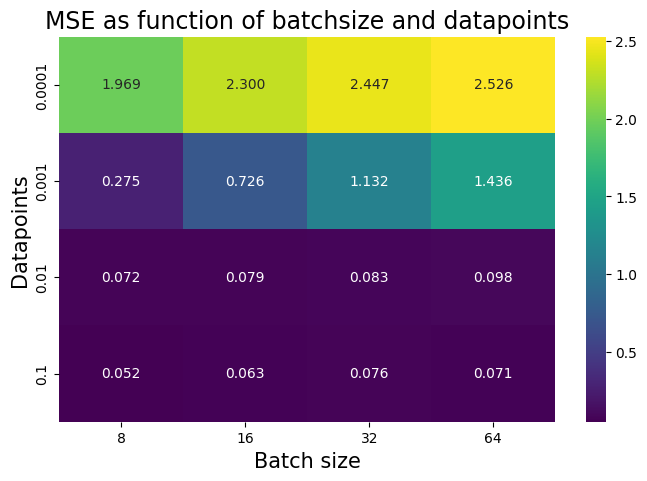

In [44]:
state=50
noise_std=0.01
epoch=20

datapoints = [100,200,500,1000]
batches = [8,16,32,64]
etas = [1e-4,1e-3,1e-2,1e-1]

plot_matrix = np.zeros((len(datapoints), len(batches)))
timeMatrixbatch = np.zeros(plot_matrix.shape)
for i, eta in enumerate(etas):
    for b, batch in enumerate(batches):
        start = time.perf_counter()
        X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, 100, noise_std=noise_std)
        linreg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=batch, learning_rate=eta, functional=False)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,b] = pointMse

        end = time.perf_counter()
        time_iter = end - start
        timeMatrixbatch[i,b] = format(time_iter, ".2f")

        print(f"Batchsize: {batch} with time: {timeMatrixbatch[i,b]}s, and learning rate {eta}")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=batches, yticklabels=etas)
ax.set_xlabel("Batch size", fontsize=15)
ax.set_ylabel("Datapoints", fontsize=15)
ax.set_title("MSE as function of batchsize and datapoints", fontsize=17)


Text(0.5, 1.0, 'Time as function of depth and nodes')

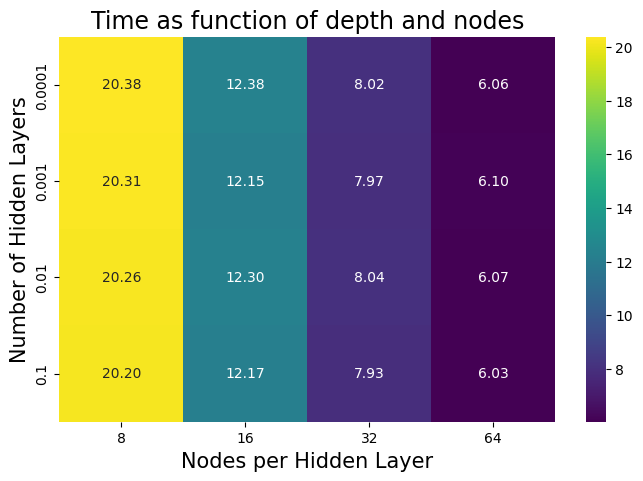

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrixbatch, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=batches, yticklabels=etas)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Time as function of depth and nodes", fontsize=17)

We note that there is no significant datapoint dependence, and that batchsizes under 64 gives the best results. We use 32 going onward, as being the least computationally expensive. Also, we use 1000 datapoints onward for convenience.

Best hyperparameters for ADAM, i.e. the sets {$\eta$, epochs} and {$\beta_1$, $\beta_2$} yielding the best result (lowest MSE)

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32364\2194270731.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


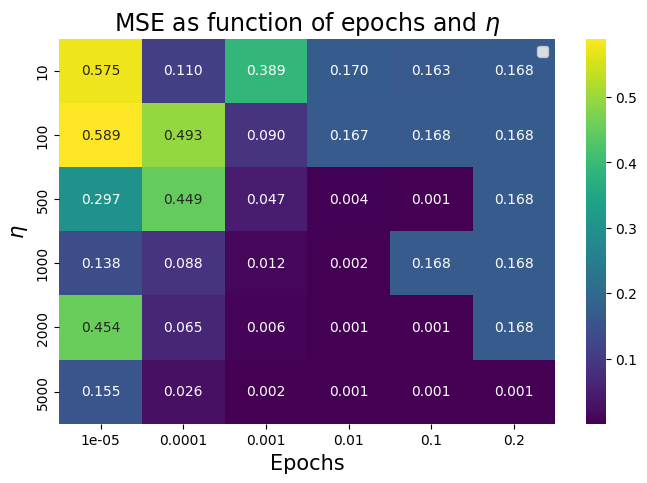

In [ ]:
# Plain without stochastic, meaning fullbatch SGD (batch_size=datapoints)

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_ADAM)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)

save_path = os.path.join(save_dir, "HM_ADAM_fullbatch.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Then test for SGD ADAM

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32364\839890689.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


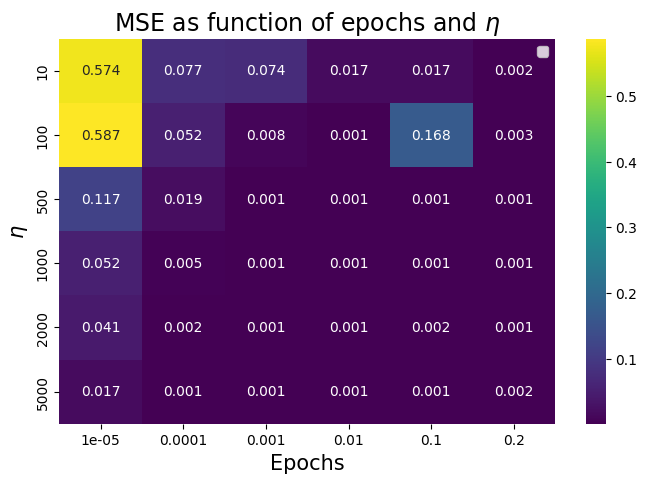

In [ ]:
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_ADAM)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)

save_path = os.path.join(save_dir, "HM_ADAM_SGD.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Test for best {$\beta_1, \beta_2$} values with $\eta$=0.1, epochs=2000 for ADAM fullbatch. Any point?

Tuninvg hyperparameters for RMS prop fullbatch. Finding the best set {$\eta$, epochs} that minimizes MSE

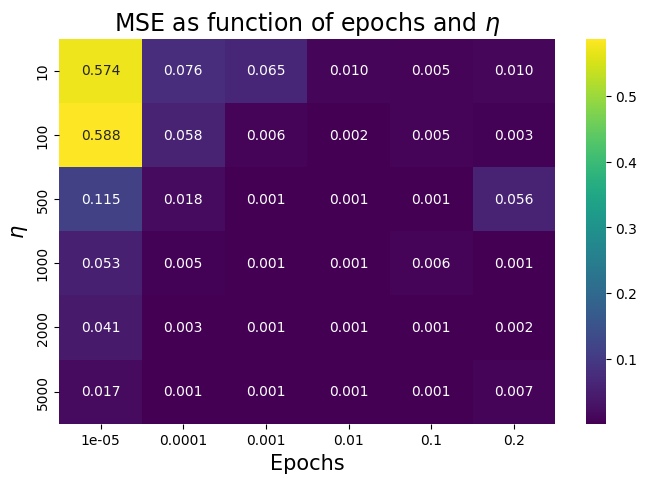

In [138]:
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_RMS)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)

save_path = os.path.join(save_dir, "HM_RMS_fullbatch.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Testing for linear regression with the best hyperparameters

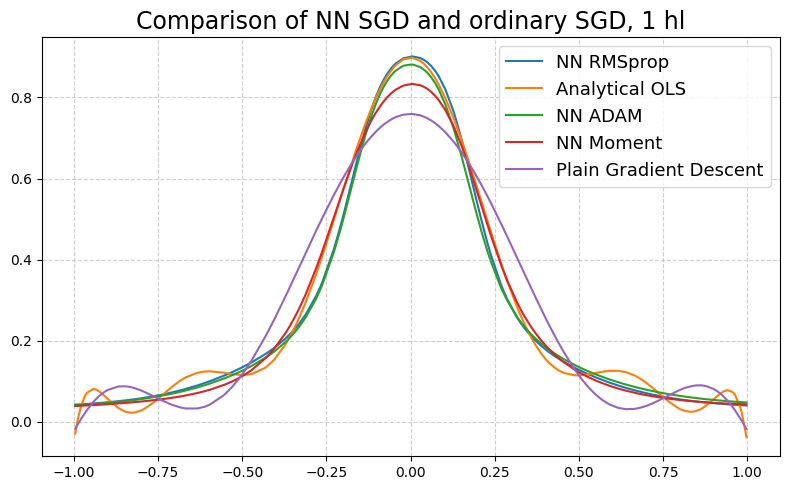

In [148]:
from classes import *

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)


linreg3 = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
linreg3.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_Moment)
pred_Mom = linreg3.feed_forward(X_test)


LinReg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_test)


linreg2 = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
linreg2.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_RMS)
pred_ = linreg2.feed_forward(X_test)

Xtr_s, Xte_s, x_train2, x_test2, y_train2, y_test2 = create_and_scale_dataP1(state, datapoints, noise_std)

y_mean = np.mean(y_train2)
y_centered = y_train2 - y_mean
g = GradientDescent(Xtr_s,5000, y_train2, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
predGD = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train2)
predOls = Xte_s@analytical_betas + y_mean

sort_indices2 = np.argsort(x_test2.flatten())
sort_indices = np.argsort(x_test.flatten())

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_test[sort_indices], pred_[sort_indices], label="NN RMSprop")
ax.plot(x_test2[sort_indices2], predOls[sort_indices2], label="Analytical OLS")
ax.plot(x_test[sort_indices], y_pred[sort_indices], label="NN ADAM")
ax.plot(x_test[sort_indices], pred_Mom[sort_indices], label="NN Moment")
ax.plot(x_test2[sort_indices2], predGD[sort_indices2], label="Plain Gradient Descent")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

ax.set_title("Comparison of NN SGD and ordinary SGD, 1 hl", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()

save_path = os.path.join(save_dir, "comparison_fit_2layers_allSGD")
fig.savefig(save_path, dpi=300, bbox_inches="tight")


Comparing MSE scores

In [152]:
print("MSE for OLS using NN RMSprop:", round(mse(pred_, y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test2), 4))
print("MSE for OLS using NN ADAM:", round(mse(y_pred, y_test), 4))
print("MSE for OLS using NN Moment:", round(mse(pred_Mom, y_test), 4))
print("MSE for OLS using plain GD:", round(mse(predGD, y_test2), 4))

MSE for OLS using NN RMSprop: 0.0007
MSE for analytical OLS: 0.0017
MSE for OLS using NN ADAM: 0.0009
MSE for OLS using NN Moment: 0.0022
MSE for OLS using plain GD: 0.0076


We can see that for the optimal parameters, RMS performs slightly better than the other gradient optimizers

Comparing analytical OLS and OLS from gradient descent with Neural Net with two layers using 50 and 100 nodes respectively

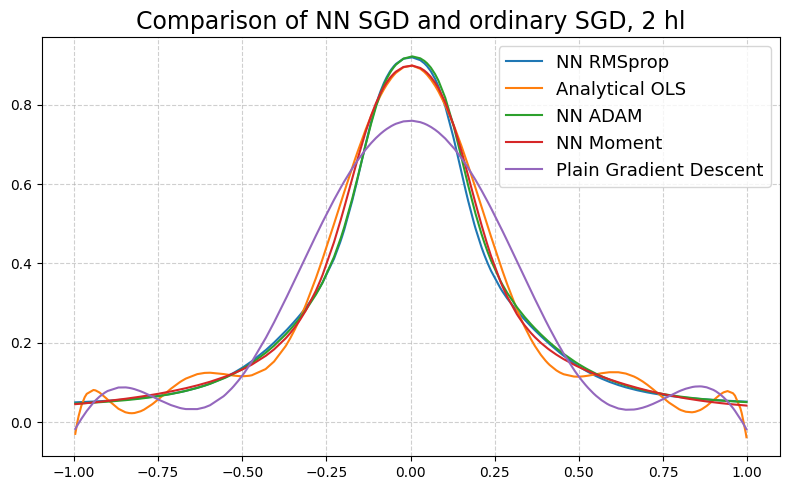

In [156]:
from classes import *

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)


linreg3 = NeuralNetwork(1, [50,100,1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], mse, mse_der)
linreg3.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_Moment)
pred_Mom = linreg3.feed_forward(X_test)


LinReg = NeuralNetwork(1, [50,100,1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_test)


linreg2 = NeuralNetwork(1, [50,100,1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], mse, mse_der)
linreg2.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_RMS)
pred_ = linreg2.feed_forward(X_test)

Xtr_s, Xte_s, x_train2, x_test2, y_train2, y_test2 = create_and_scale_dataP1(state, datapoints, noise_std)

y_mean = np.mean(y_train2)
y_centered = y_train2 - y_mean
g = GradientDescent(Xtr_s,5000, y_train2, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
predGD = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train2)
predOls = Xte_s@analytical_betas + y_mean

sort_indices2 = np.argsort(x_test2.flatten())
sort_indices = np.argsort(x_test.flatten())

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_test[sort_indices], pred_[sort_indices], label="NN RMSprop")
ax.plot(x_test2[sort_indices2], predOls[sort_indices2], label="Analytical OLS")
ax.plot(x_test[sort_indices], y_pred[sort_indices], label="NN ADAM")
ax.plot(x_test[sort_indices], pred_Mom[sort_indices], label="NN Moment")
ax.plot(x_test2[sort_indices2], predGD[sort_indices2], label="Plain Gradient Descent")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

ax.set_title("Comparison of NN SGD and ordinary SGD, 2 hl", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()

# save_path = os.path.join(save_dir, "comparison_fit_3layers_allSGD")
# fig.savefig(save_path, dpi=300, bbox_inches="tight")

Calculating and comparing MSE values

In [154]:
print("MSE for OLS using NN RMSprop:", round(mse(pred_, y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test2), 4))
print("MSE for OLS using NN ADAM:", round(mse(y_pred, y_test), 4))
print("MSE for OLS using NN Moment:", round(mse(pred_Mom, y_test), 4))
print("MSE for OLS using plain GD:", round(mse(predGD, y_test2), 4))

MSE for OLS using NN RMSprop: 0.1676
MSE for analytical OLS: 0.0017
MSE for OLS using NN ADAM: 0.1676
MSE for OLS using NN Moment: 0.0007
MSE for OLS using plain GD: 0.0076


Testing for 2D Runge

In [ ]:
np.random.seed(50)

n = 100
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = runge2d(x,x) +  np.random.normal(0, 0.1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))

LinReg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, eta=0.2, n_epochs=5000)
y_pred = LinReg.feed_forward(X_test)

y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()

X, Y = np.meshgrid(x, x)

Z = runge2d(X,Y)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='plasma', rstride=5, cstride=5) 

ax.set_title("")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (f(x, y))')


TypeError: train_SGD() got an unexpected keyword argument 'n_epochs'

Testing fonts

In [157]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,               # Use LaTeX for all text
    "font.family": "serif",            # Use LaTeX default serif font
    "font.serif": ["Computer Modern"], # Optional: specify explicitly
    "axes.labelsize": 14,
    "font.size": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title(r"Function $y = \sin(x)$")
ax.set_xlabel(r"$x$ (radians)")
ax.set_ylabel(r"$y$")
fig.tight_layout()
plt.show()


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(file.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)

! LaTeX Error: File `geometry.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.15 ^^M
        
No pages of output.
Transcript written on file.log.




Error in callback <function _draw_all_if_interactive at 0x000002298C375EE0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(file.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)

! LaTeX Error: File `geometry.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.15 ^^M
        
No pages of output.
Transcript written on file.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(file.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Jogga\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)

! LaTeX Error: File `geometry.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.15 ^^M
        
No pages of output.
Transcript written on file.log.




<Figure size 640x480 with 1 Axes>